Time to load instance: 0.002960681915283203
Time to initialize the model: 0.002287149429321289
Time to build the model: 0.06591200828552246
Time to solve the model: 0.2612454891204834
SolutionSummary(cost=179.99460601493132,
                total_duration=1920.0,
                total_waiting=903.4574270618939,
                avg_waiting=225.86435676547347,
                total_transit=178.07673092680199,
                avg_transit=44.519182731700496)
SolutionSolver(sol_objvalue=179.99460601493135,
               sol_cputime=328,
               graph_numedges=249,
               graph_numnodes=18,
               solver_numconstrs=2496,
               solver_numvars=1172,
               solver_numiterations=551,
               solver_numnodes=1)
{0: 0 D:    74.2221 Q:  1 W:   322.2660 T:    48.0767   0 (w:   0.00; b:   0.00; t:   0.00; q:   0.00)   4 (w: 112.54; b: 120.00; t:   0.00; q:   1.00)  12 (w:   0.60; b: 138.00; t:  15.00; q:   0.00)   2 (w: 168.56; b: 315.92; t:   0.00; q: 

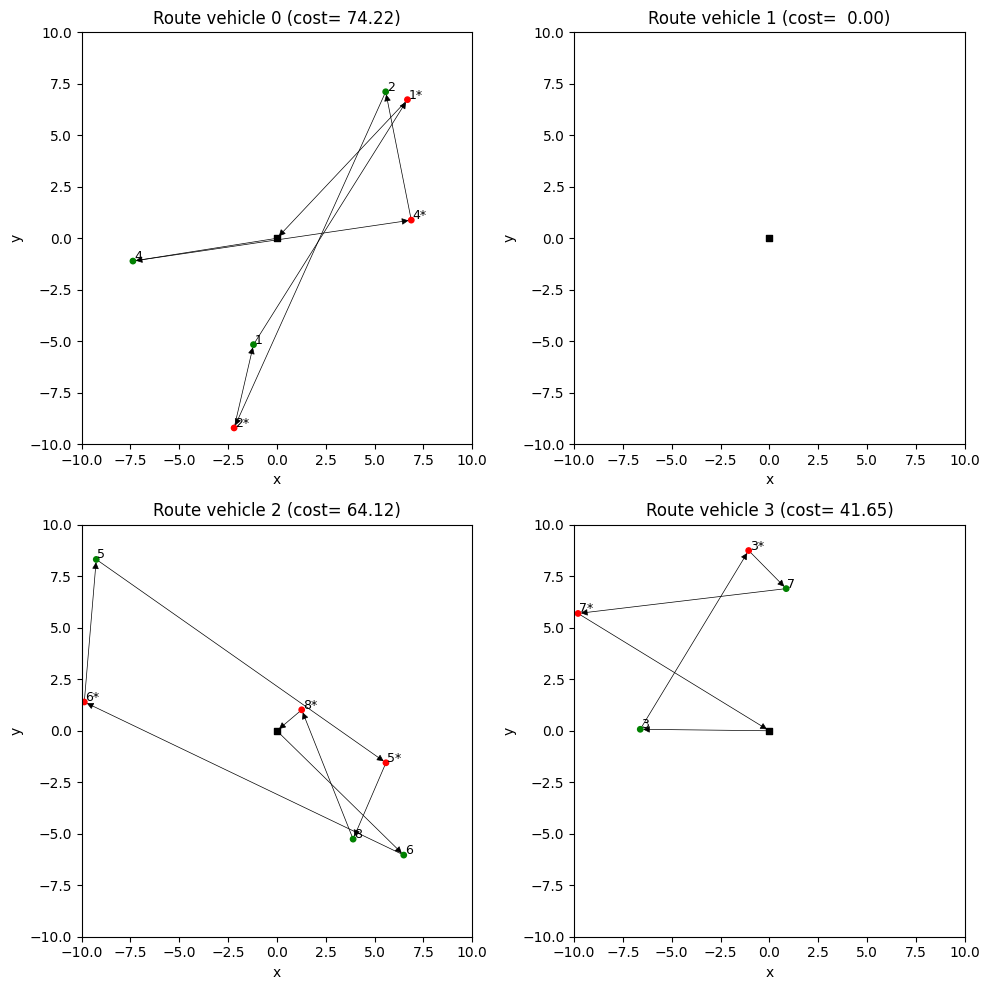

In [11]:
# %%
import sys
sys.path.append("../")

from src import parse_instance_from_filepath
import src.solver.darp as darp
from time import time

import matplotlib.pyplot as plt
from src.visualization.route import plot_vehicle_route
from pprint import pprint

# Instance generated 
instance_filepath = "../data/raw/darp_instances/darp_cordeau_2006/a4-8"

t_start = time()
instance_obj = parse_instance_from_filepath(instance_filepath)
print("Time to load instance:", time() - t_start)

# Show the instance node data as a Pandas DataFrame
instance_obj.nodeset_df

# Initialize, sets, arcs, distance matrix
t_start = time()
model = darp.Darp(instance_obj)
print("Time to initialize the model:", time() - t_start)

# Set constraints, variables, objective function
t_start = time()
model.build()
print("Time to build the model:", time() - t_start)

# Minimize cost
t_start = time()
solution_obj = model.solve()
print("Time to solve the model:", time() - t_start)

# Show a summary of the solution stats
pprint(solution_obj.summary)

# Show solver specific info
pprint(solution_obj.solver_stats)

# Show vehicle routes as a dictionary (key=vehicle id, value=vehicle route info)
pprint(solution_obj.vehicle_routes)

# Show the routes for each vehicle as a Pandas DataFrame.
# Notice that the the a "dist" function is passed to calculate the distances
# between subsequent nodes. This distance function belongs to the DARP model.
df = solution_obj.route_df(fn_dist=model.dist)
df


n_vehicles = 4
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # Creating a 2x2 grid of plots
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

for vehicle_id, vehicle_sol in  solution_obj.vehicle_routes.items():
    plot_vehicle_route(
        axs[vehicle_id],
        vehicle_sol.route,
        instance_obj.nodes,
        show_legend=False,
        title=f"Route vehicle {vehicle_id} ({vehicle_sol.summary()})",
    )

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure to use in report
plt.savefig("../reports/figures/routes_panel.svg")

